In [15]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Load and Explore the Dataset
try:
    # Load dataset
    df = pd.read_csv('todays_data.csv')  # Make sure the file is in your working directory

    # Clean column names (remove extra spaces)
    df.columns = df.columns.str.strip()

    # Display first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Check data types
    print("\nData types:")
    print(df.dtypes)

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

 # Drop rows with missing 'Academic Level'
    df_cleaned = df.dropna(subset=['Academic Level'])

except FileNotFoundError:
    print("Error: File not found. Please check the filename and path.")
except Exception as e:
    print("An error occurred:", e)

First 5 rows of the dataset:
   First Name Country      Gender Academic Level
0  abdikhafar   Kenya        male  UnderGraduate
1         plp   Kenya  non_binary            NaN
2    milicent   Kenya      female  UnderGraduate
3    jeremiah   Kenya        male  UnderGraduate
4        emma   Kenya      female        Diploma

Data types:
First Name        object
Country           object
Gender            object
Academic Level    object
dtype: object

Missing values:
First Name        0
Country           0
Gender            0
Academic Level    3
dtype: int64


In [16]:
# Task 2: Basic Data Analysis
# Describe numerical columns (or all if mostly categorical)
print("\nBasic statistics:")
print(df_cleaned.describe(include='all'))

# Grouping example: count of Academic Level by Gender
print("\nAcademic Level counts by Gender:")
print(df_cleaned.groupby('Gender')['Academic Level'].value_counts())

# Another grouping: Gender counts per Academic Level
print("\nGender counts by Academic Level:")
print(df_cleaned.groupby('Academic Level')['Gender'].value_counts())


Basic statistics:
       First Name Country Gender Academic Level
count         350     350    350            350
unique        257       1      2              8
top         brian   Kenya   male  UnderGraduate
freq            7     350    257            204

Academic Level counts by Gender:
Gender  Academic Level
female  UnderGraduate      60
        undergraduate      15
        HighSchool          9
        Diploma             4
        PostGraduate        2
        diploma             2
        secondary           1
male    UnderGraduate     144
        HighSchool         43
        Diploma            29
        undergraduate      19
        secondary          14
        diploma             5
        PostGraduate        2
        other               1
Name: count, dtype: int64

Gender counts by Academic Level:
Academic Level  Gender
Diploma         male       29
                female      4
HighSchool      male       43
                female      9
PostGraduate    female      2
 

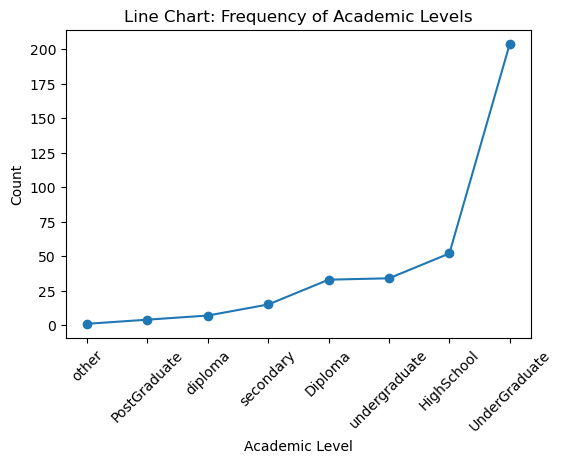

In [24]:
# Task 3: Data Visualization

# 1. Line chart (simulate trends using Academic Level frequency)
plt.figure(figsize=(6, 4))
df_cleaned['Academic Level'].value_counts().sort_values().plot(kind='line', marker='o')
plt.title("Line Chart: Frequency of Academic Levels")
plt.xlabel("Academic Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

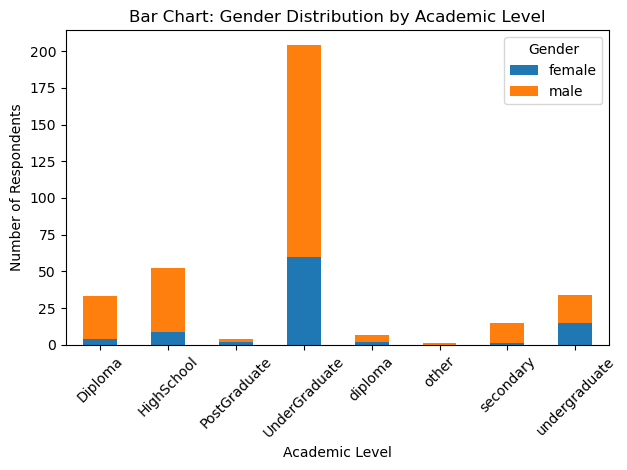

In [25]:
# 2. Bar chart: Gender counts by Academic Level
bar_data = df_cleaned.groupby('Academic Level')['Gender'].value_counts().unstack()
bar_data.plot(kind='bar', stacked=True)
plt.title("Bar Chart: Gender Distribution by Academic Level")
plt.xlabel("Academic Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

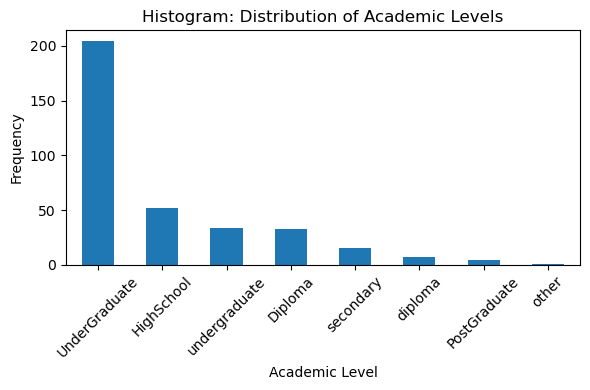

In [28]:
# 3. Histogram of Academic Level
plt.figure(figsize=(6, 4))
df_cleaned['Academic Level'].value_counts().plot(kind='bar')
plt.title("Histogram: Distribution of Academic Levels")
plt.xlabel("Academic Level")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_524/4146160789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Index'] = range(len(df_cleaned))
/tmp/ipykernel_524/4146160789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Name_Length'] = df_cleaned['First Name'].apply(len)


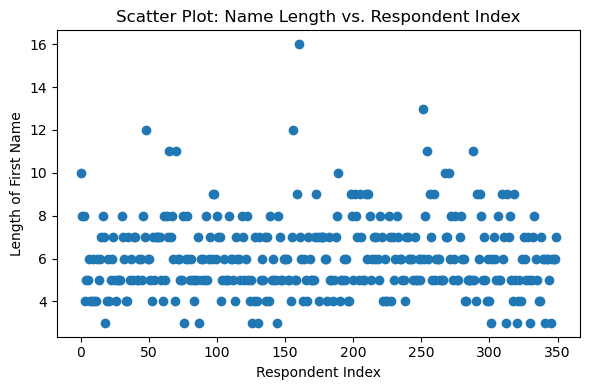

In [29]:
# 4. Scatter plot: Index vs. Name Length
df_cleaned['Index'] = range(len(df_cleaned))
df_cleaned['Name_Length'] = df_cleaned['First Name'].apply(len)

plt.figure(figsize=(6, 4))
plt.scatter(df_cleaned['Index'], df_cleaned['Name_Length'])
plt.title("Scatter Plot: Name Length vs. Respondent Index")
plt.xlabel("Respondent Index")
plt.ylabel("Length of First Name")
plt.tight_layout()
plt.show()